<a href="https://colab.research.google.com/github/Cristian0901/mipimermodeloIA/blob/main/defenderIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving defender_DataBase.csv to defender_DataBase.csv


In [4]:
import io
import pandas as pd
dfDB = pd.read_csv(io.BytesIO(uploaded['defender_DataBase.csv']))

In [11]:
dfDB = dfDB.drop(columns='index')
dfDB = dfDB.drop(columns='Id')
dfDB

,Live,Attack,Rest,Cure,NextAction
0,1.0,1.0,1.0,2.0,3.0
1,1.0,1.0,2.0,2.0,3.0
2,1.0,2.0,1.0,1.0,3.0
3,1.0,2.0,2.0,2.0,3.0
4,1.0,1.0,2.0,1.0,3.0
...,...,...,...,...,...
95,2.0,1.0,1.0,2.0,1.0
96,2.0,1.0,1.0,1.0,2.0
97,2.0,1.0,1.0,1.0,2.0
98,1.0,2.0,2.0,1.0,3.0


In [12]:
dfDB.isna().sum()

Live          0
Attack        0
Rest          0
Cure          0
NextAction    0
dtype: int64

<function matplotlib.pyplot.show>

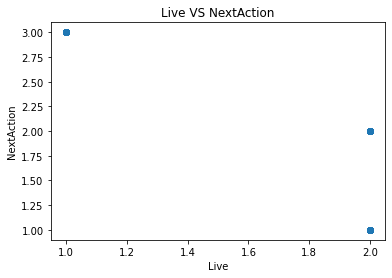

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=dfDB['Live'], y=dfDB['NextAction'])
plt.title('Live VS NextAction')
plt.xlabel('Live')
plt.ylabel('NextAction')
plt.show

<function matplotlib.pyplot.show>

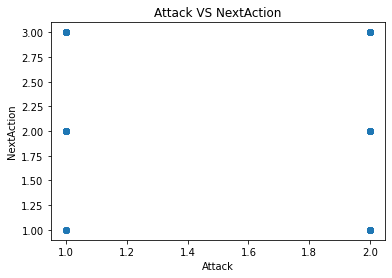

In [15]:
plt.scatter(x=dfDB['Attack'], y=dfDB['NextAction'])
plt.title('Attack VS NextAction')
plt.xlabel('Attack')
plt.ylabel('NextAction')
plt.show

<function matplotlib.pyplot.show>

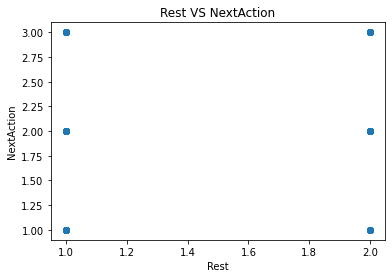

In [16]:
plt.scatter(x=dfDB['Rest'], y=dfDB['NextAction'])
plt.title('Rest VS NextAction')
plt.xlabel('Rest')
plt.ylabel('NextAction')
plt.show

<function matplotlib.pyplot.show>

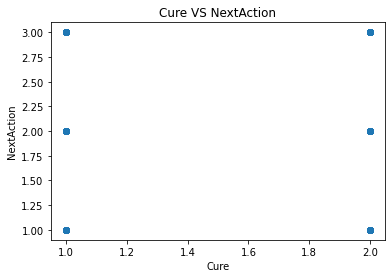

In [17]:
plt.scatter(x=dfDB['Cure'], y=dfDB['NextAction'])
plt.title('Cure VS NextAction')
plt.xlabel('Cure')
plt.ylabel('NextAction')
plt.show

In [20]:
dfDB_entrenamiento = dfDB.sample(frac=0.8, random_state=0)
dfDB_test = dfDB.drop(dfDB_entrenamiento.index)

In [23]:
dfDB_entrenamiento_etiqueta = dfDB_entrenamiento.pop('NextAction')
dfDB_test_etiqueta = dfDB_test.pop('NextAction')

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(dfDB_entrenamiento, dfDB_entrenamiento_etiqueta)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predicciones = model.predict(dfDB_test)
predicciones

array([1.63379908, 1.49032801, 3.13188237, 1.46616442, 3.01257489,
       1.46616442, 1.49032801, 1.49032801, 3.01257489, 1.74758846,
       1.60411739, 3.01257489, 3.13188237, 1.63379908, 1.60411739,
       3.15604596, 1.60963549, 1.57995381, 3.04225658, 1.60963549])

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(dfDB_test_etiqueta, predicciones))
print('Error porcentual: %f' % (error*100))

Error porcentual: 36.134812


In [28]:
new_player = pd.DataFrame(np.array([[1, 3, 3, 1]]), columns=['Live', 'Attack', 'Rest', 'Cure'])
new_player

,Live,Attack,Rest,Cure
0,1,3,3,1


In [29]:
model.predict(new_player)

array([2.95872962])

In [30]:
#Aqui termina la creacion esto es lo basico

In [37]:
new_player = pd.DataFrame(np.array([[2, 1, 2, 1]]), columns=['Live', 'Attack', 'Rest', 'Cure'])
x = model.predict(new_player)
if x >2.5:
  print('Me curo')
  print(x)
elif x > 1.5 and x < 2.5:
  print('Descanso')
  print(x)
else:
  print('Ataco')
  print(x)

Descanso
[1.72342488]
